In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import datetime
import matplotlib.dates as mdates

# Part 1

### * First, you will prepare the dataset for time series analysis

In [2]:
Zillow_Home_Value_Index_df = pd.read_csv('C:/Users/Dell/Downloads/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
Zillow_Home_Value_Index_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


### * Filter the 4 largest cities into a new dataframe

In [3]:
Zillow_Home_Value_Index_df=Zillow_Home_Value_Index_df.sort_values(by='SizeRank', ascending=True)
Zillow_Home_Value_Index_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
df_largest_cities = Zillow_Home_Value_Index_df.loc[0:3]
df_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### * Melt the data to long-form and prepare it for time series analysis

In [5]:
df_largest_cities.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
2022-09-30    float64
Length: 281, dtype: object

In [6]:
df_largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [7]:
id_cols=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'Metro', 'CountyName']
melted = pd.melt(df_largest_cities, id_vars = id_cols, value_name = "Typical Home Value", var_name= 'Date')

In [8]:
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Typical Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [9]:
melted.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', 'Date', 'Typical Home Value'],
      dtype='object')

In [10]:
melted['Date'] = pd.to_datetime(melted['Date'])

In [11]:
melted=melted.set_index("Date")

In [21]:
resampled_df = melted.groupby('RegionName').resample("M").mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22020\1367151447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = melted.groupby('RegionName').resample("M").mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_22020\1367151447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = melted.groupby('RegionName').resample("M").mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_22020\1367151447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colum

In [22]:
resampled_df.head(2)

RegionID  SizeRank  Typical Home Value
RegionName Date                                              
Chicago    2000-01-31   17426.0       3.0            166139.0
           2000-02-29   17426.0       3.0            166536.0

# Part 2 

### Plot the home values for all 4 cities.

In [23]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

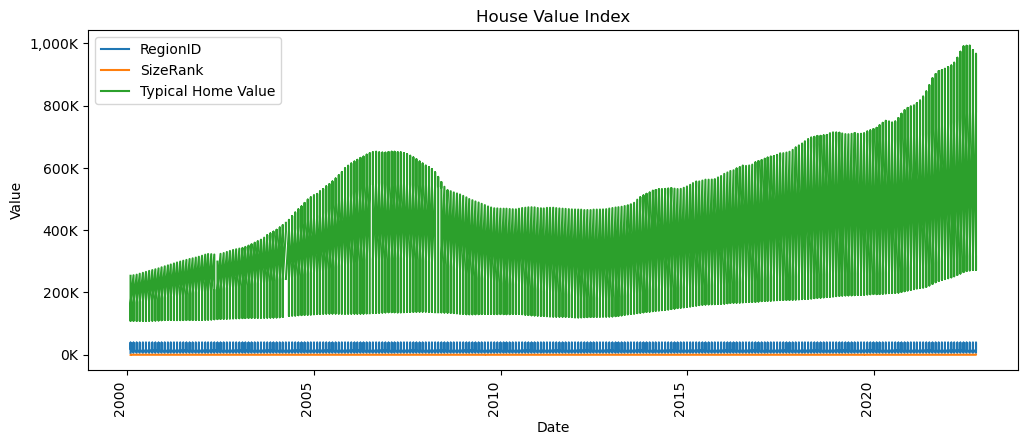

In [24]:
ax = melted.plot(figsize=(12,5))
ax.set(title='House Value Index', ylabel='Value')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)



ax.yaxis.set_major_formatter(fmt_thous)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

### Answer the following 2 questions using pandas

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [28]:
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Typical Home Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [29]:
df_2008 = melted.loc['2008-06-01': '2008-12-31' ]
df_2008

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Typical Home Value
Date,,,,,,,,,
2008-06-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,533810.0
2008-06-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,539622.0
2008-06-30,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,135773.0
2008-06-30,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,288495.0
2008-07-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,529211.0
2008-07-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,524220.0
2008-07-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,135392.0
2008-07-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,288174.0
2008-08-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,525290.0


In [30]:
print('the highest Typical Home Value at the end of 2008: ',df_2008['Typical Home Value'].max())
print('the least Typical Home Value at the end of 2008: ',df_2008['Typical Home Value'].min())

the highest Typical Home Value at the end of 2008:  539622.0
the least Typical Home Value at the end of 2008:  131283.0


2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [32]:
df_diff = melted.loc['2008-11-01': '2008-12-31' ]
df_diff

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Typical Home Value
Date,,,,,,,,,
2008-11-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,514767.0
2008-11-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,481905.0
2008-11-30,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,132247.0
2008-11-30,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,271059.0
2008-12-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,510309.0
2008-12-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,469294.0
2008-12-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,131283.0
2008-12-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,265306.0


In [33]:
df_diff['Typical Home Value'].diff()

Date
2008-11-30         NaN
2008-11-30    -32862.0
2008-11-30   -349658.0
2008-11-30    138812.0
2008-12-31    239250.0
2008-12-31    -41015.0
2008-12-31   -338011.0
2008-12-31    134023.0
Name: Typical Home Value, dtype: float64

# Time Series Models for Home Values

In [34]:
import statsmodels.tsa.api as tsa
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import pmdarima as pm

### Filter the dataset only to include values starting in 2018

In [35]:
df_2018=resampled_df.loc['2018-01-01': ]
df_2018

RegionID  SizeRank  Typical Home Value
RegionName Date                                              
Chicago    2000-01-31   17426.0       3.0            166139.0
           2000-02-29   17426.0       3.0            166536.0
           2000-03-31   17426.0       3.0            167368.0
           2000-04-30   17426.0       3.0            168826.0
           2000-05-31   17426.0       3.0            170499.0
...                         ...       ...                 ...
New York   2022-05-31    6181.0       0.0            768797.0
           2022-06-30    6181.0       0.0            773944.0
           2022-07-31    6181.0       0.0            777692.0
           2022-08-31    6181.0       0.0            779960.0
           2022-09-30    6181.0       0.0            781622.0

[1092 rows x 3 columns]

### Check for and address null values

In [36]:
df_2018.isnull().sum()

RegionID              0
SizeRank              0
Typical Home Value    5
dtype: int64

In [37]:
df_2018=df_2018.dropna()

In [38]:
df_2018.isnull().sum()

RegionID              0
SizeRank              0
Typical Home Value    0
dtype: int64

### Decompose the Time series to detect seasonality

<Axes: xlabel='RegionName,Date'>

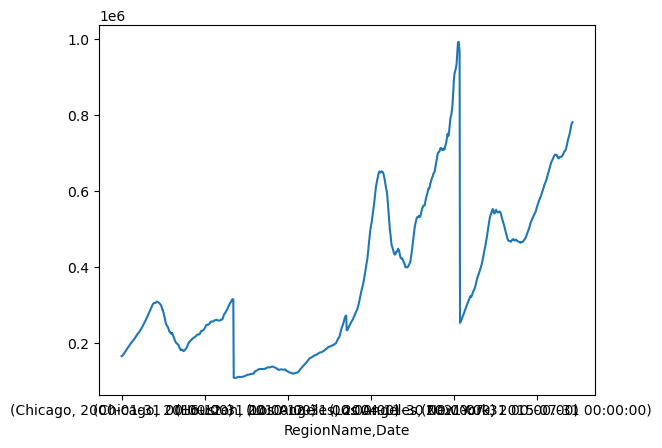

In [42]:
ts = df_2018['Typical Home Value']
ts.plot()

The data is non seasonal

### Determine Time Series Model Orders

Check for stationarity

In [45]:
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): 
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [46]:
def plot_acf_pacf(ts, nlags=20, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig

In [47]:
def plot_forecast( ts_test, forecast_df, n_train_lags=20, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    fig, ax = plt.subplots(figsize=figsize)
   
    ts_test.plot(label="test", ax=ax)
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    ax.set_title(title)
    ax.legend();
    return fig, ax

In [48]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100
    if verbose == True:
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")
    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [49]:
adfuller_results = get_adfuller_results(ts, label='Typical Home Value')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Typical Home Value,-1.398886,0,1086,0.58281,0.05,False


In [50]:
d=ndiffs(ts)
d

1

In [51]:
nsdiffs(ts, m = 12)

0

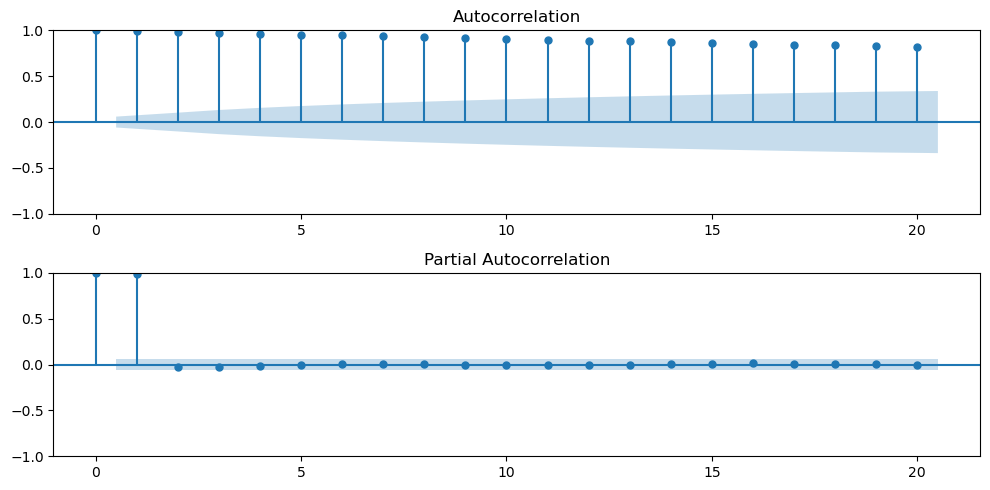

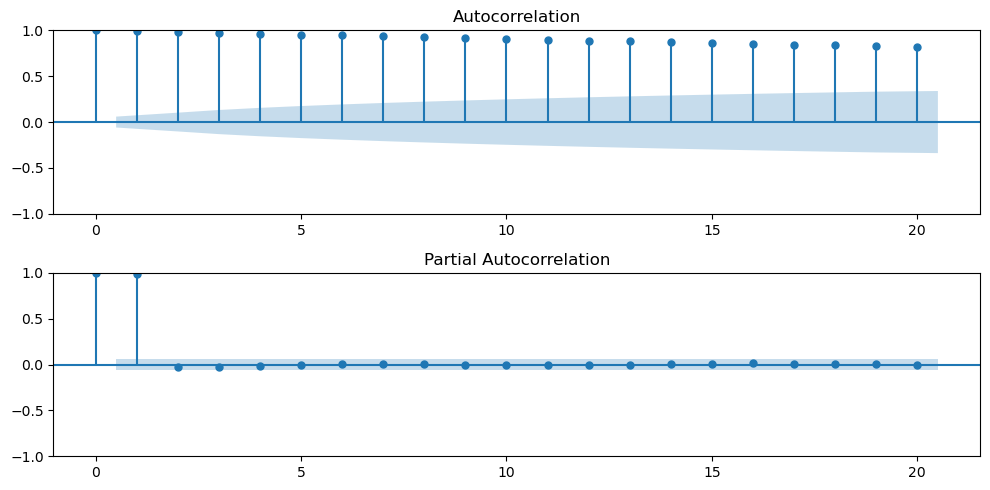

In [52]:
plot_acf_pacf(ts)

### Split the time series into training and test data

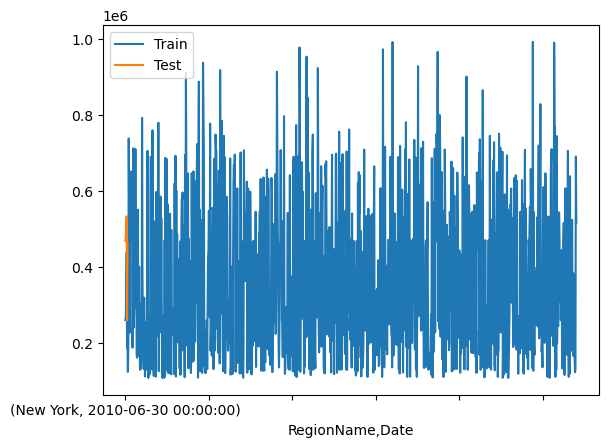

In [53]:
test_lags = 6 
train, test = train_test_split(ts, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend()

### Ignore Seasonal Component and run ARIMA MODEL

In [54]:
p = 1  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 0  # nonseasonal MA

arima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
arima.summary()

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Typical Home Value   No. Observations:                 1081
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14757.218
Date:                Wed, 03 Jul 2024   AIC                          29520.437
Time:                        20:37:04   BIC                          29535.394
Sample:                             0   HQIC                         29526.100
                               - 1081                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.63e+05   6154.151     58.988      0.000    3.51e+05    3.75e+05
ar.L1         -0.0163      0.029     -0.559      0.576      -0.073       0.041
sigma2       4.22e+10      0.010   4.25e+12      0.000    4.22e+10    4.22e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                93.95
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.67
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.82e+27. Standard errors may be unstable.
"""

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 123,020.965
- MSE = 15,738,086,022.893
- RMSE = 125,451.529
- R^2 = -1.006
- MAPE = 28.05%


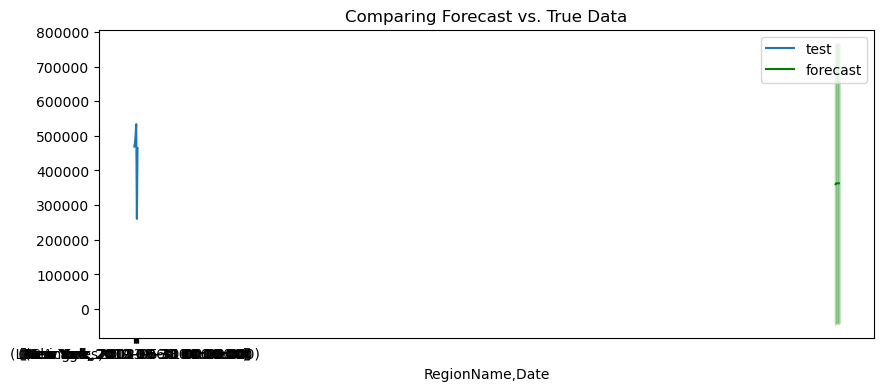

In [55]:
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
plot_forecast( test, forecast_df);
regression_metrics_ts(test, forecast_df['mean'])

### Tune with pmdarima's auto_arima

In [56]:
auto_model = pm.auto_arima(
    train,
    seasonal=False,  
    m=12,
    trace=True
)

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31048.332, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=30144.638, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=30681.403, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29902.822, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=29805.054, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=29753.975, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=29705.793, Time=0.27 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=29527.025, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=29525.914, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=29524.072, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29522.070, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   :

In [57]:
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 0, 0)
(0, 0, 0, 0)


In [58]:
p = 0 # nonseasonal AR
d = 0  # nonseasonal differencing
q = 0 # nonseasonal MA

# Orders for seasonal components
P = 0 # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 0 # Seasonal period

auto_sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
auto_sarima.summary()


C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Typical Home Value   No. Observations:                 1081
Model:                          ARIMA   Log Likelihood              -17993.101
Date:                Wed, 03 Jul 2024   AIC                          35990.201
Time:                        20:37:49   BIC                          36000.173
Sample:                             0   HQIC                         35993.977
                               - 1081                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.63e+05   6.75e+06      0.054      0.957   -1.29e+07    1.36e+07
sigma2       4.56e+13   2.78e+12     16.424      0.000    4.02e+13     5.1e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                93.64
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.67
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
len(test)

6

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 122,606.993
- MSE = 15,649,377,450.038
- RMSE = 125,097.472
- R^2 = -0.995
- MAPE = 27.97%


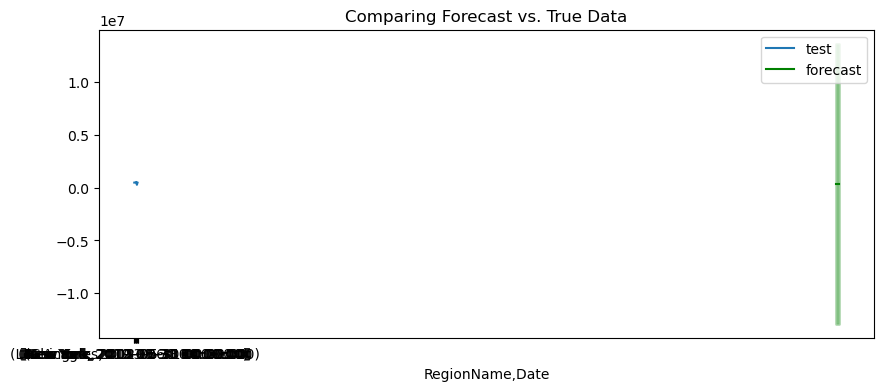

In [60]:
forecast_df = auto_sarima.get_forecast(len(test)).summary_frame()
plot_forecast( test, forecast_df)
regression_metrics_ts(test, forecast_df["mean"])

### Select your final model

The first model performs better than the auto model comparing the MAE and MAPE scores. meanwhile Forecasting data is not doing well with testing data. 

### Make true future forecasts using the entire dataset

In [61]:
ts= resampled_df['Typical Home Value']
ts.head(2)

RegionName  Date      
Chicago     2000-01-31    166139.0
            2000-02-29    166536.0
Name: Typical Home Value, dtype: float64

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 123,020.965
- MSE = 15,738,086,022.893
- RMSE = 125,451.529
- R^2 = -1.006
- MAPE = 28.05%


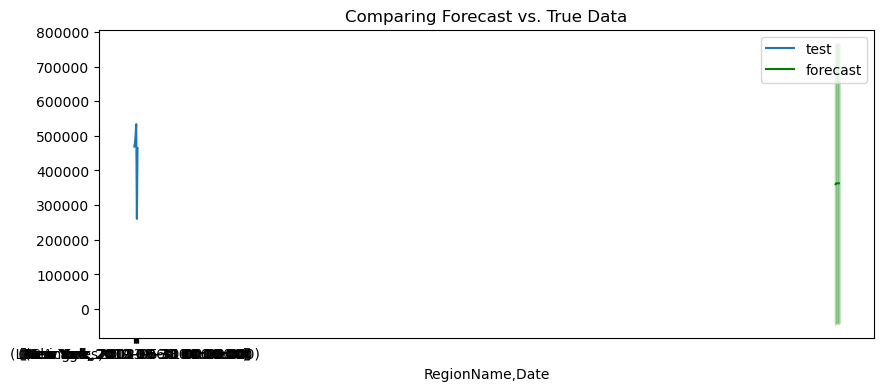

In [62]:
forecast_df = arima.get_forecast(steps=len(test)).summary_frame()
plot_forecast( test, forecast_df);
regression_metrics_ts(test, forecast_df['mean'])

C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\anaconda3_v1\envs\dojo-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


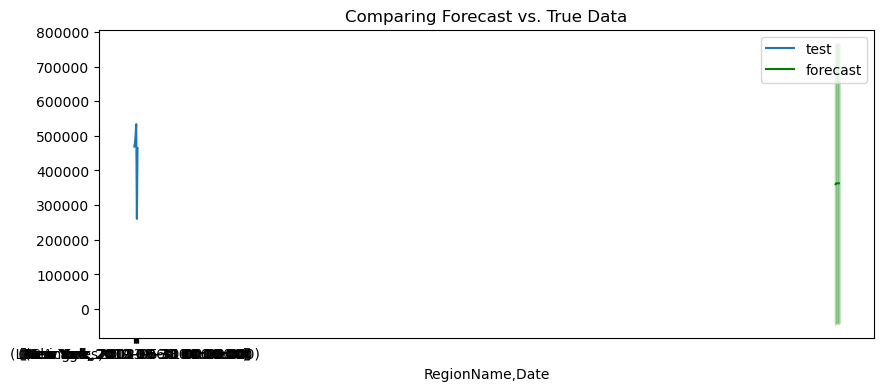

In [63]:
forecast_df  = arima.get_forecast(len(test)).summary_frame()
plot_forecast(test,forecast_df);

In [64]:
(forecast_df.index[0],forecast_df.index[-1])

(1081, 1086)

In [65]:
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
perc_change = (change / starting_value) * 100
perc_change

0.700200890531408

What is the predicted home value in New York City 6 months into the future (beyond the dataset)?